<a href="https://colab.research.google.com/github/jrakhshanda55/Ausaf_ML/blob/main/Athar_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning
Supervised machine learning operates as a framework within the broader field of machine learning. In this paradigm, algorithms are trained using input objects and corresponding labeled output values from a designated training dataset. The primary aim of supervised learning is to establish a mapping from inputs to outputs, thereby empowering the algorithm (or machine learning model) to make predictions or decisions upon new, previously unseen data.

Machine learning can be broadly categorized intot two main types based on the nature of the output varoable: regression, which deals with predicting numerical values, and classification, which focuses on categorizing data into distinct groups.

In [3]:
#Importing Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Classification

In [22]:
iris = datasets.load_iris()

# Create a DataFrame with the data and feature names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.shape)
df.head()


(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Exploratory Data Analysis (EDA)

In [25]:
df.iloc[:,:-2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


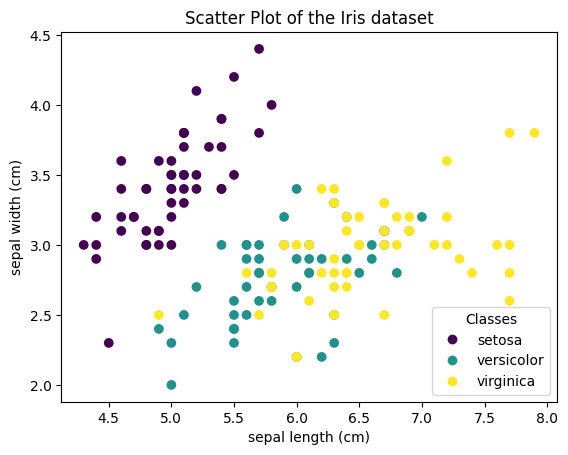

In [26]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
plt.title('Scatter Plot of the Iris dataset')
plt.show()

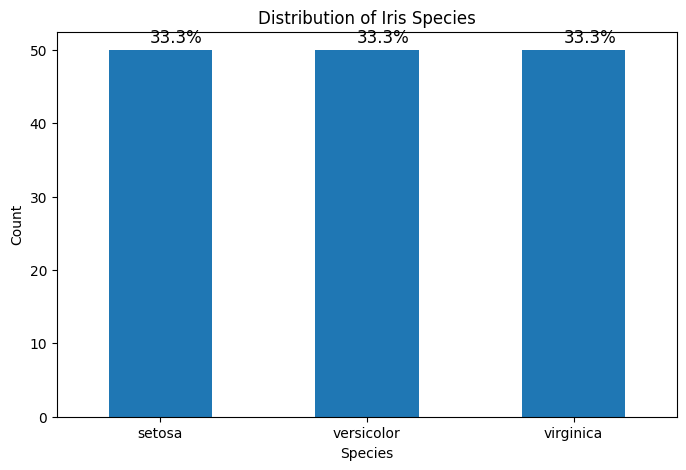

In [23]:
plt.figure(figsize=(8, 5))
ax = df.species.value_counts().plot(kind='bar')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 1
    ax.annotate(percentage, (x, y), fontsize=12)

plt.xticks(rotation=0)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Iris Species')
plt.show()

**Class Distribution Analysis:**
The Iris dataset demonstrates a balanced distribution across its three classes (setosa,versicolor, and virginica). Each class represents approximately one-third of the dataset. This balance is advantageous, promoting fair model training and evaluation across all classes.

Each point in the scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolour, and Virginica). You can already see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal. Only considering these 2 dimensions, sepal width and length, there’s still overlap between the Versicolor and Virginica types.